**DECISION TREE**

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.


<img src = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fblog.mindmanager.com%2Fdecision-tree-diagrams%2F&psig=AOvVaw3h9La9jtJFTQ85I67sm3fz&ust=1763681529805000&source=images&cd=vfe&opi=89978449&ved=0CBYQjRxqFwoTCMDHn_Gv_5ADFQAAAAAdAAAAABAE"/>


**Classification and Regression Trees (CART)**

Nowadays, Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees.

In this project, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.

**Some of the regularization parameters**

Max_depth: It is the maximal length of a path that is from root to leaf. Leaf nodes are not split further because they can create a tree with leaf nodes that takes many inspections on one side of the tree whereas nodes that contain very less inspection get again split.

Min_sample_spilt: It is the limit that is imposed to stop the further splitting of nodes.

Min_sample_leaf: A min number of samples that a leaf node has. If leaf nodes have only a few findings it can then result in overfitting.

Max_leaf_node: It is defined as the max no of leaf nodes in a tree. (Relatable article: What are the Model Parameters and Evaluation Metrics used in Machine Learning?)

Max_feature_size: It is computed as the max no of features that are examined for the splitting for each node.

Min_weight_fraction_leaf: It is similar to min_sample_leaf that is calculated in the fraction of total no weighted instances.

**Task**

In this notebook we implement the decision tree algorithm for binary species classification, indicating whether or not a particular internet user has clicked on an Advertisement.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/advertising.csv')

<Figure size 1000x1000 with 0 Axes>

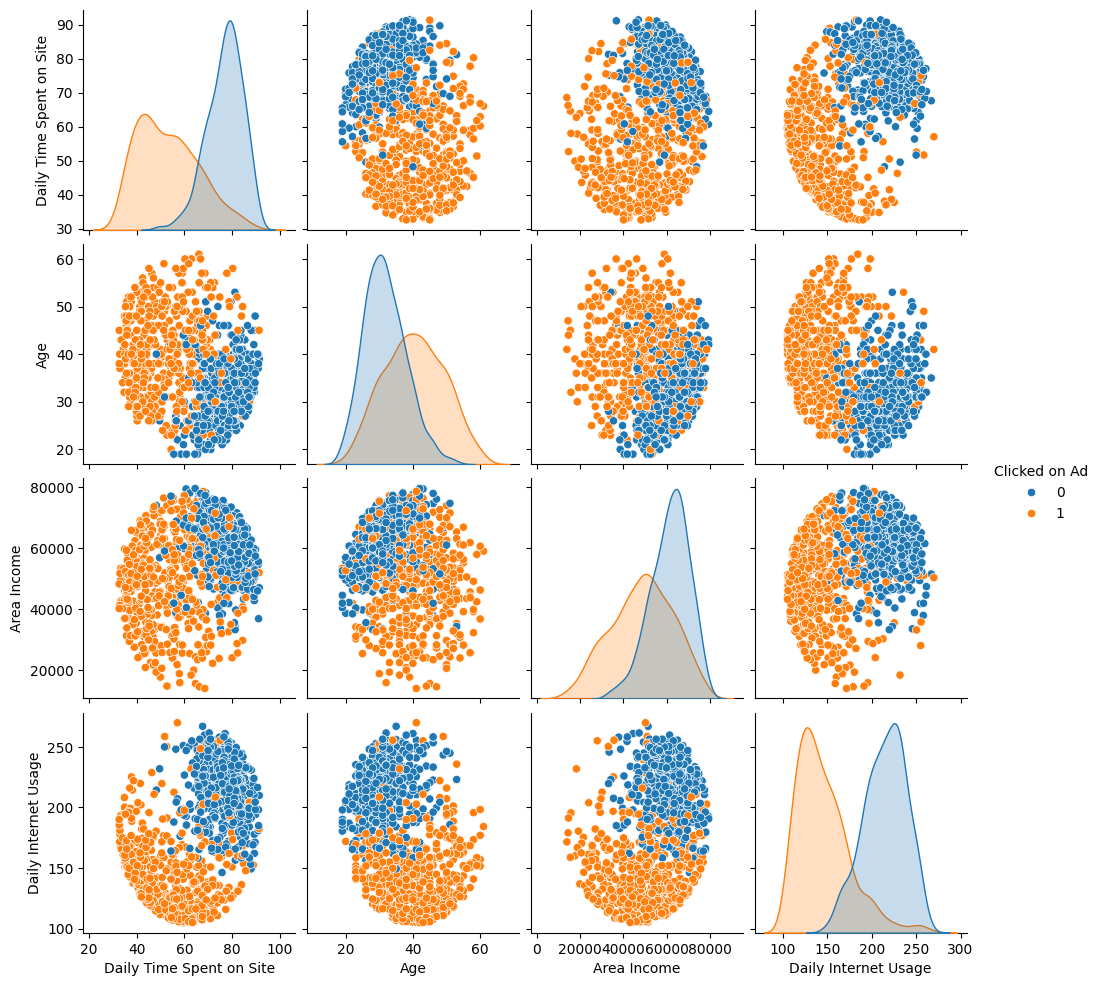

In [4]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data,
    hue ='Clicked on Ad',
    vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],
    diag_kind='kde',

)
plt.show()

In [5]:
X = data[['Age','Daily Time Spent on Site']]
y = data['Clicked on Ad']

In [6]:
X= X.to_numpy()
y = y.to_numpy ()

In [7]:
colors = ['steelblue' if label == 0 else 'darkorange' for label in y]

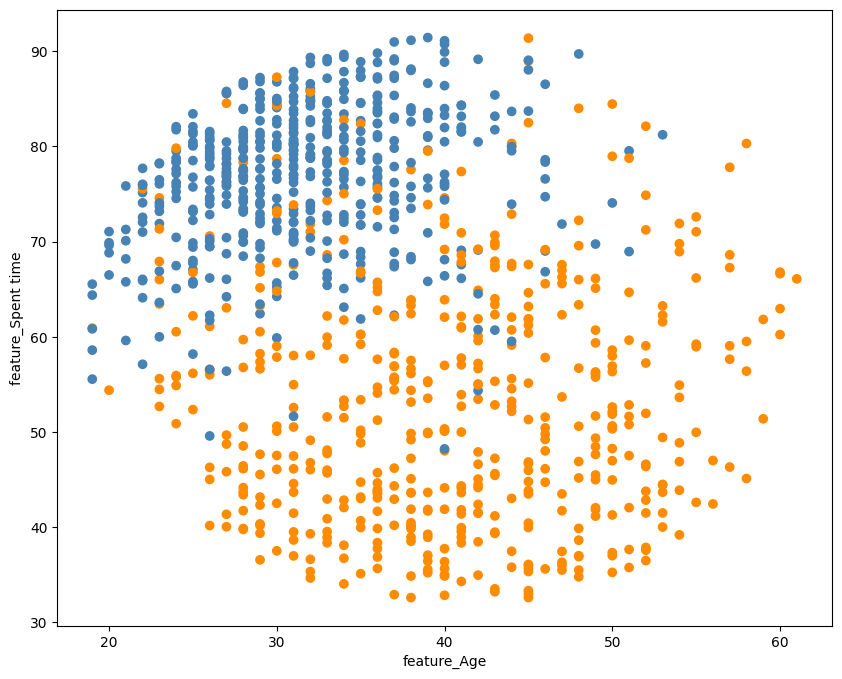

In [8]:
plt.figure (figsize=(10,8))
plt.scatter (X[:,0], X[:,1], c= colors)
plt.xlabel ('feature_Age')
plt.ylabel ('feature_Spent time')
plt.show ()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.4, random_state =42)

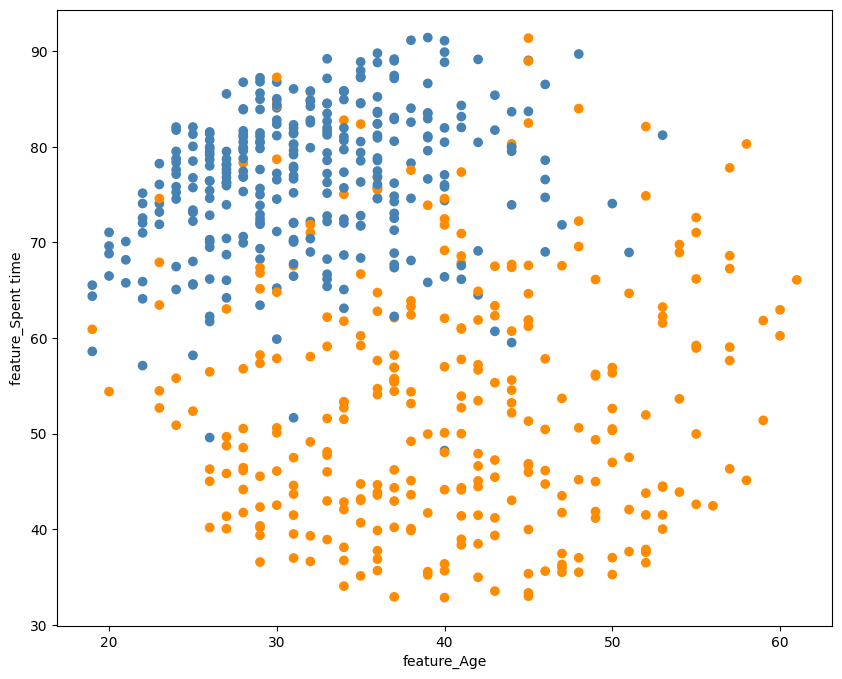

In [10]:
c_train = ['steelblue' if label == 0 else 'darkorange' for label in y_train]
c_test = ['steelblue' if label == 0 else 'darkorange' for label in y_test]
plt.figure (figsize =(10,8))

plt.scatter (X_train[:,0], X_train [:,1], c= c_train)
plt.xlabel ('feature_Age')
plt.ylabel ('feature_Spent time')
plt.show ()

In [11]:
features = ['X_0','X_1']
labels = ['blue','orange']

**Decision Tree Model**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [13]:
decision_tree = DecisionTreeClassifier(max_depth =3, random_state =42)
decision_tree.fit (X_train, y_train)
DecisionTreeClassifier(max_depth=3, random_state=42)
print ('decision_tree')
print (metrics.classification_report (y_test, decision_tree.predict (X_test)))

decision_tree
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       191
           1       0.97      0.78      0.87       209

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.87       400
weighted avg       0.89      0.88      0.87       400



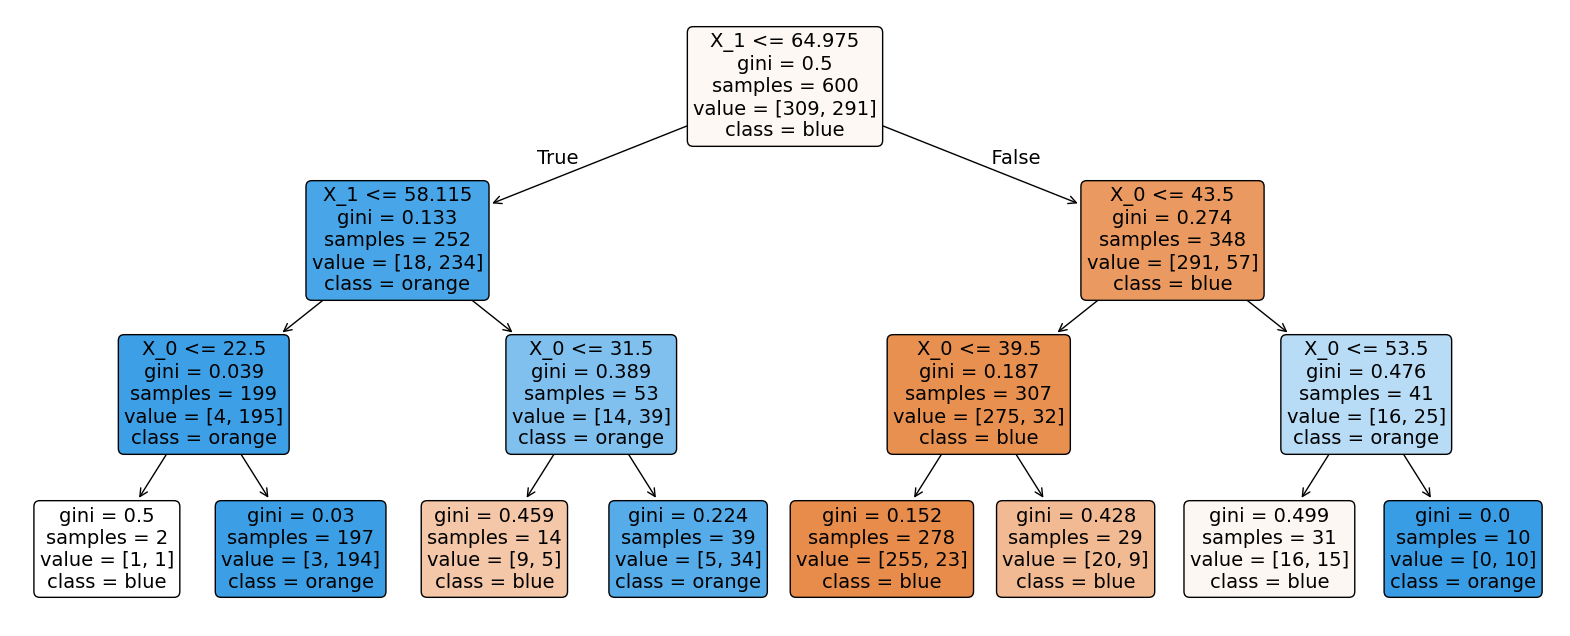

In [14]:
from sklearn import tree

plt.figure (figsize =(20,8))
a = tree.plot_tree (decision_tree,
              feature_names = features,
              class_names = labels,
              rounded = True,
              filled = True,
              fontsize =14)
plt.show ()


In [15]:
from sklearn.tree import export_text

tree_rules = export_text (decision_tree, feature_names =features)
print (tree_rules)

|--- X_1 <= 64.97
|   |--- X_1 <= 58.11
|   |   |--- X_0 <= 22.50
|   |   |   |--- class: 0
|   |   |--- X_0 >  22.50
|   |   |   |--- class: 1
|   |--- X_1 >  58.11
|   |   |--- X_0 <= 31.50
|   |   |   |--- class: 0
|   |   |--- X_0 >  31.50
|   |   |   |--- class: 1
|--- X_1 >  64.97
|   |--- X_0 <= 43.50
|   |   |--- X_0 <= 39.50
|   |   |   |--- class: 0
|   |   |--- X_0 >  39.50
|   |   |   |--- class: 0
|   |--- X_0 >  43.50
|   |   |--- X_0 <= 53.50
|   |   |   |--- class: 0
|   |   |--- X_0 >  53.50
|   |   |   |--- class: 1



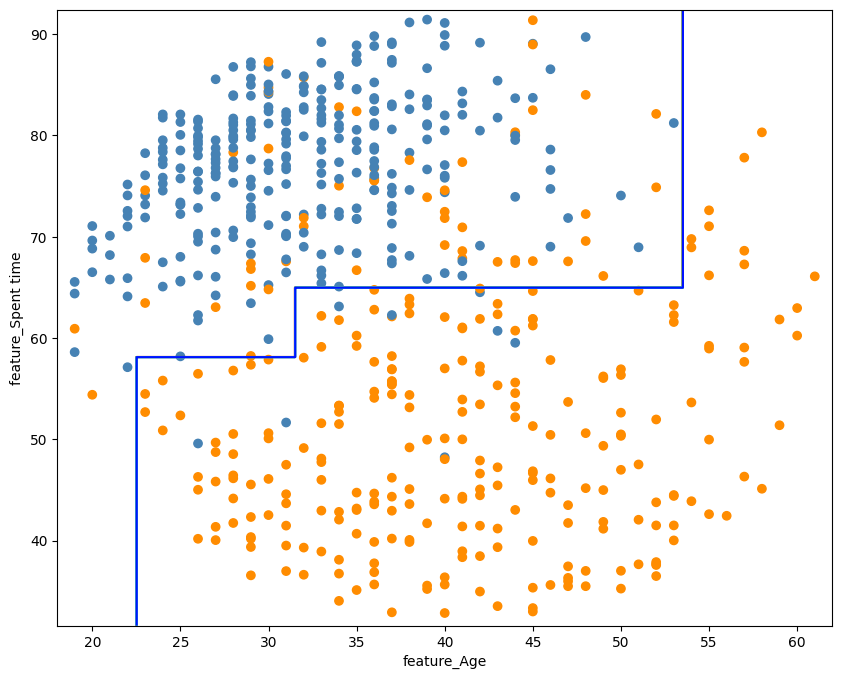

In [16]:
# Set a plot_step
plot_step =0.02

plt.figure (figsize=(10,8))
# plot the decision boundary
x_min, x_max = X [:,0].min ()-1, X[:,0].max()+1
y_min, y_max = X [:,1].min ()-1, X[:,1].max()+1

# plt.tight_layout
xx, yy = np.meshgrid (np.arange (x_min, x_max, plot_step),
                     np.arange (y_min, y_max, plot_step))

Z = decision_tree.predict (np.c_[xx.ravel (), yy.ravel ()])
Z = Z.reshape (xx.shape)
cs = plt.contour (xx, yy, Z, cmap ='jet_r')

plt.scatter (X_train [:,0], X_train [:,1], c = c_train)
plt.xlabel ('feature_Age')
plt.ylabel ('feature_Spent time')
plt.show ()

**Test and Evaluation**

In [17]:
y_pred = decision_tree.predict (X_test)

# import metrics from sklearn
from sklearn import metrics
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix (y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_dt = pd.DataFrame (confusion_matrix)

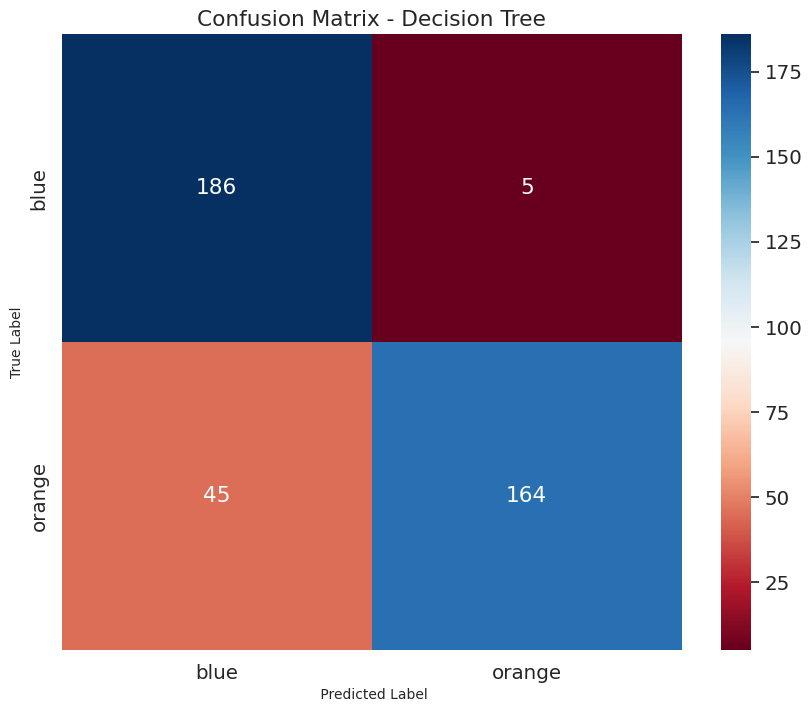

In [25]:
plt.figure (figsize =(10,8))

ax= plt.axes ()
sns.set (font_scale =1.3)
sns.heatmap(matrix_dt,
            annot =True,
           fmt = 'g',
           ax = ax,
          cmap="RdBu")

ax.set_title ('Confusion Matrix - Decision Tree')
ax.set_xlabel (' Predicted Label', fontsize =10)
ax.set_xticklabels (labels)
ax.set_ylabel ('True Label', fontsize =10)
ax.set_yticklabels (labels)
plt.show ()

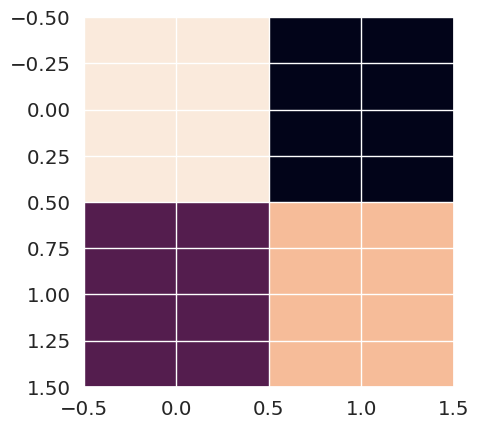

In [19]:
plt.imshow (confusion_matrix)

In [20]:
print (f'accuracy score = { metrics.accuracy_score (y_test, y_pred)}')

accuracy score = 0.875


In [21]:
print (f'precision score')
precision = metrics.precision_score (y_test,
                                     y_pred,
                                    average = None)

precision_results = pd.DataFrame (precision, index = labels)
precision_results.rename (columns= {0:'precison'}, inplace = True)
precision_results

precision score


,precison
blue,0.805195
orange,0.970414


In [22]:
#Recall and rthe f1-score

print (metrics.classification_report (y_test,
                                     y_pred))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88       191
           1       0.97      0.78      0.87       209

    accuracy                           0.88       400
   macro avg       0.89      0.88      0.87       400
weighted avg       0.89      0.88      0.87       400



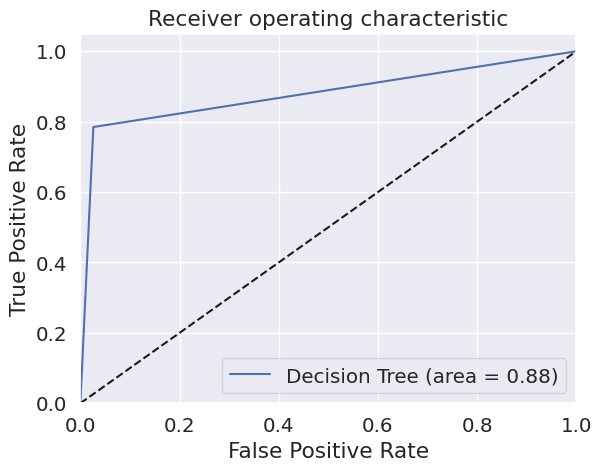

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()